# Analysis Question 3: What is the difference between the average ESG scores for the top 50 companies vs lowest 50 companies based on market cap?

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind

In [5]:
# reading in the data frame 
data = pd.read_csv('Model_CSV.csv')

# remapping  ESG risk levels into binary labels: 0 = Low risk, 1 = High risk
data["ESG_label"] = data["ESG risk"].map({
    "Negligible": 0,
    "Low": 0,
    "Medium": 0,
    "High": 1,
    "Severe": 1
})

# if needed taking out outliers 
# outliers_trimmed = data_sorted.iloc[77:]
# outlier_count2 = count_outliers2(outliers_trimmed['Revenue (TTM)'])
# outlier_count2

# Hypothesis Testing 

### Null Hypothesis: ESG scores will not vary with high or low market cap 

### Alternative Hypothesis: ESG scores do vary with high or low market cap


In [11]:
# data_clean = data.dropna(subset

# sort and show the top 50 Market Cap 
data_high_cap = data.sort_values(by='Market Cap', ascending=False).head(50)

# sort and show the lowest 50 for Market Cap
data_low_cap = data.sort_values(by='Market Cap', ascending=True).head(50)
data_high_cap

,Ticker,Company,P/E Ratio,Forward P/E,Revenue (TTM),Gross Profits,Net Income,EBITDA,Market Cap,Sector,ESG score,ESG risk,ESG_label
33,AAPL,Apple Inc.,33.127186,25.074608,3.957600e+11,1.841030e+11,9.615000e+10,1.373520e+11,3.130160e+12,Technology,18.9,Low,0
280,MSFT,Microsoft Corporation,31.259079,25.906355,2.618020e+11,1.817150e+11,9.275000e+10,1.420410e+11,2.879180e+12,Technology,17.3,Low,0
306,NVDA,NVIDIA Corporation,36.200680,25.832525,1.304970e+11,9.785800e+10,7.288000e+10,8.331700e+10,2.596890e+12,Technology,12.5,Low,0
19,AMZN,"Amazon.com, Inc.",33.793476,30.331705,6.379590e+11,3.116710e+11,5.924800e+10,1.204680e+11,1.979640e+12,Consumer Cyclical,26.1,Medium,0
17,GOOGL,Alphabet Inc.,19.810946,17.776785,3.500180e+11,2.037120e+11,1.001180e+11,1.294970e+11,1.953660e+12,Communication Services,24.9,Medium,0
274,META,"Meta Platforms, Inc.",22.316870,21.073124,1.645010e+11,1.343710e+11,6.236000e+10,8.371700e+10,1.345910e+12,Communication Services,32.7,High,1
58,AVGO,Broadcom Inc.,87.106476,30.494326,5.452900e+10,4.158200e+10,1.039700e+10,2.884100e+10,8.846720e+11,Technology,19.2,Low,0
388,TSLA,"Tesla, Inc.",149.143680,80.095680,9.572400e+10,1.690700e+10,6.107000e+09,1.255000e+10,8.358710e+11,Consumer Cyclical,24.8,Medium,0
252,LLY,Eli Lilly and Company,73.544050,37.940422,4.504270e+10,3.662440e+10,1.059000e+10,1.926830e+10,7.720280e+11,Healthcare,23.6,Medium,0
424,WMT,Walmart Inc.,39.767630,35.235290,6.809850e+11,1.692320e+11,1.943600e+10,4.222200e+10,7.683350e+11,Consumer Defensive,25.3,Medium,0


# Univariate Testing 

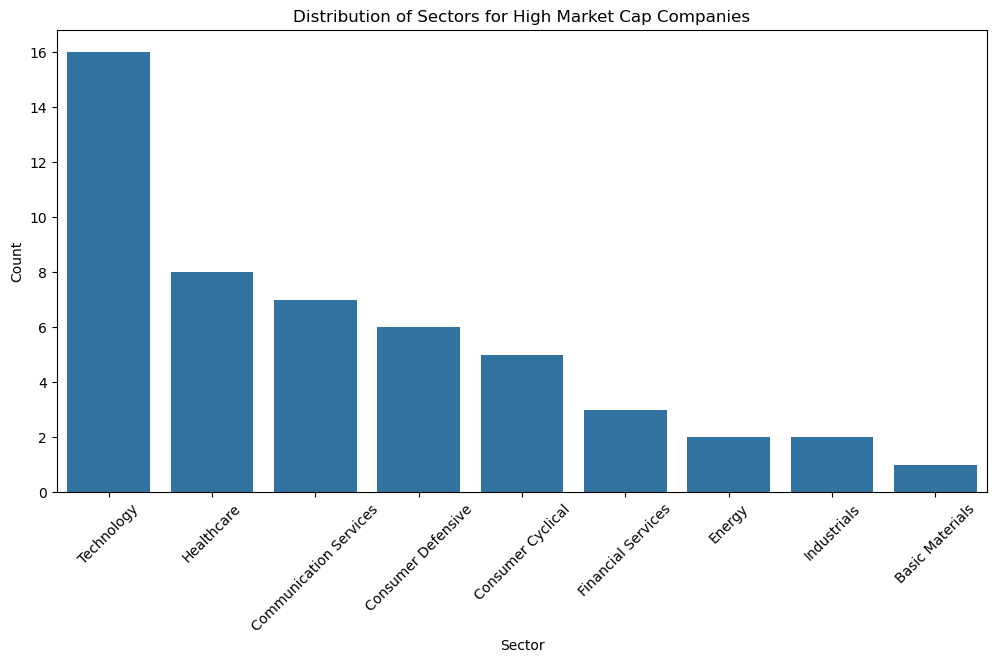

In [13]:
# plotting sector distribution by high Market Cap
plt.figure(figsize=(12, 6))
sns.countplot(data=data_high_cap, x='Sector', order=data_high_cap['Sector'].value_counts().index)
plt.title('Distribution of Sectors for High Market Cap Companies')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Here it is clear that technolodgy is a clear leader in market cap which makes sense because of stocks like apple and NVDIA

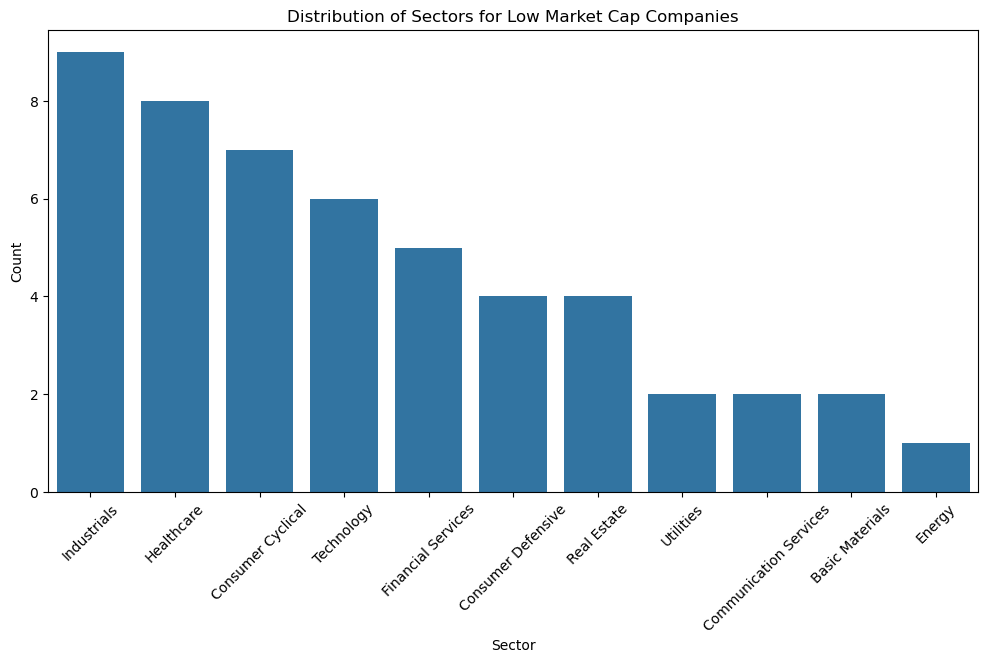

In [16]:
# plotting sector distribution by low Market Cap
plt.figure(figsize=(12, 6))
sns.countplot(data=data_low_cap, x='Sector', order=data_low_cap['Sector'].value_counts().index)
plt.title('Distribution of Sectors for Low Market Cap Companies')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

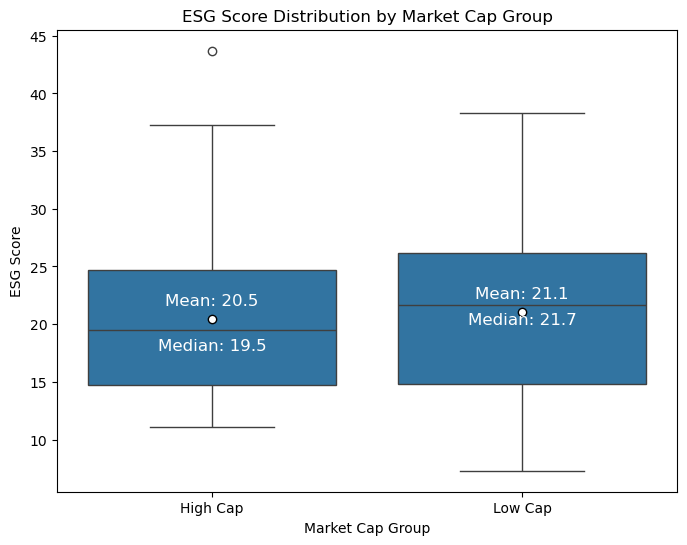

In [18]:
# creating high and low cap groups and a new combined Market Cap Dataframe
data_high_cap['Cap Group'] = 'High Cap'
data_low_cap['Cap Group'] = 'Low Cap'
combined_cap_data = pd.concat([data_high_cap, data_low_cap])

# plotting the combined data 
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=combined_cap_data, x='Cap Group', y='ESG score', showmeans=True,
                 meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})

# adding median and mean labels
for i, cap_group in enumerate(['High Cap', 'Low Cap']):
    group_scores = combined_cap_data[combined_cap_data['Cap Group'] == cap_group]['ESG score']
    median_val = group_scores.median()
    mean_val = group_scores.mean()

    # median label
    ax.text(i, median_val - 2, f'Median: {median_val:.1f}', color='white', ha='center', va='bottom', fontsize=12)

    # mean label
    ax.text(i, mean_val + 1.2, f'Mean: {mean_val:.1f}', color='white', ha='center', fontsize=12)

plt.title('ESG Score Distribution by Market Cap Group')
plt.xlabel('Market Cap Group')
plt.ylabel('ESG Score')
plt.show()

#### A suprising finding shows that the ESG score for the lower end of market caps is actually higher than the top market caps 
#### This shows that bigger companies doesn't necessarily mean that they have less sustainable practice

In [21]:
display(combined_cap_data)

,Ticker,Company,P/E Ratio,Forward P/E,Revenue (TTM),Gross Profits,Net Income,EBITDA,Market Cap,Sector,ESG score,ESG risk,ESG_label,Cap Group
33,AAPL,Apple Inc.,33.127186,25.074608,3.957600e+11,1.841030e+11,9.615000e+10,1.373520e+11,3.130160e+12,Technology,18.9,Low,0,High Cap
280,MSFT,Microsoft Corporation,31.259079,25.906355,2.618020e+11,1.817150e+11,9.275000e+10,1.420410e+11,2.879180e+12,Technology,17.3,Low,0,High Cap
306,NVDA,NVIDIA Corporation,36.200680,25.832525,1.304970e+11,9.785800e+10,7.288000e+10,8.331700e+10,2.596890e+12,Technology,12.5,Low,0,High Cap
19,AMZN,"Amazon.com, Inc.",33.793476,30.331705,6.379590e+11,3.116710e+11,5.924800e+10,1.204680e+11,1.979640e+12,Consumer Cyclical,26.1,Medium,0,High Cap
17,GOOGL,Alphabet Inc.,19.810946,17.776785,3.500180e+11,2.037120e+11,1.001180e+11,1.294970e+11,1.953660e+12,Communication Services,24.9,Medium,0,High Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,JNPR,"Juniper Networks, Inc.",41.313950,17.944443,5.073600e+09,2.981500e+09,2.879000e+08,5.207000e+08,1.187686e+10,Technology,12.9,Low,0,Low Cap
96,CAG,"ConAgra Brands, Inc.",36.647060,9.263941,1.173690e+10,3.129900e+09,3.291000e+08,2.138700e+09,1.189586e+10,Consumer Defensive,27.5,Medium,0,Low Cap
14,ALLE,Allegion plc,19.594100,17.908857,3.772200e+09,1.668500e+09,5.975000e+08,8.968000e+08,1.200474e+10,Industrials,20.8,Medium,0,Low Cap
391,TXT,Textron Inc.,15.299549,10.138806,1.370200e+10,2.483000e+09,8.250000e+08,1.481000e+09,1.233751e+10,Industrials,33.1,High,1,Low Cap


## Hypothesis TTest -- running a ttest to see if the means of each group have a significant difference before making a model 

In [24]:
top_scores = combined_cap_data[combined_cap_data["Cap Group"] == "High Cap"]["ESG score"]
low_scores = combined_cap_data[combined_cap_data["Cap Group"] == "Low Cap"]["ESG score"]
t_stat, p_value = ttest_ind(top_scores, low_scores, equal_var=False)

print(f"T-stat: {t_stat:.4f}, P-value: {p_value:.4f}")

T-stat: -0.4247, P-value: 0.6720


### the p-value shows there is not a statistically significant difference in ESG score means between the highest and lowest companies  

### Decided to just try logistic regression to see if the intercept would be negative 

In [28]:
combined_cap_data["GroupBinary"] = combined_cap_data["Cap Group"].map({"Low Cap": 0, "High Cap": 1})

X = combined_cap_data[["ESG score"]]
y = combined_cap_data["GroupBinary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print(f"Model Coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

Model Coefficient: 0.0162
Intercept: -0.3059


### the coefficient being negative does support our previous finding that as ESG score increases the likelihood of being in the Top market cap group decreases. But due to this specific dataset only having 100 instances, it is not sufficient enough to determine if this is true to build a model off of. 